<h1 align="center">Hands-On Machine Learning | AI2YOU</font></h1>
<br>
<p style="text-align: center;align:center"><font size = 5>Polynomial Regression</font></p>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# Step0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn import metrics

# Step1: Read Data

The Boston house-price data

 Variables in order:
 
 <b>CRIM: </b>     per capita crime rate by town
 
 <b>ZN: </b>       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 <b>INDUS: </b>    proportion of non-retail business acres per town
 
 <b>CHAS: </b>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 <b>NOX: </b>      nitric oxides concentration (parts per 10 million)
 
 <b>RM: </b>       average number of rooms per dwelling
 
 <b>AGE: </b>      proportion of owner-occupied units built prior to 1940
 
 <b>DIS: </b>      weighted distances to five Boston employment centres
 
 <b>RAD: </b>      index of accessibility to radial highways
 
 <b>TAX: </b>      full-value property-tax rate per 10,000
 
 <b>PTRATIO: </b>  pupil-teacher ratio by town
 
 <b>B: </b>        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 <b>LSTAT: </b>    % lower status of the population
 
 <b>MEDV: </b>     Median value of owner-occupied homes in 1000's

In [6]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
df = pd.read_csv('Boston_house_price.csv', delimiter="\s+", names=column_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Step2: X, y

In [9]:
X = df.drop('Price', axis=1)

y = df['Price']

In [10]:
X.shape

(506, 13)

In [11]:
y.shape

(506,)

# Step3: Linear Regression

### train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
X_train.shape

(354, 13)

In [14]:
X_test.shape

(152, 13)

### Creat the Model

In [15]:
LR = LinearRegression()

### Train the Model

In [16]:
LR.fit(X_train, y_train)

LinearRegression()

In [17]:
LR.coef_

array([-8.85049752e-02,  5.02928536e-02,  2.03483110e-02,  3.75427054e+00,
       -1.77483714e+01,  3.24776492e+00,  1.20008182e-02, -1.40916141e+00,
        2.63880691e-01, -1.03440009e-02, -9.51780874e-01,  6.11600491e-03,
       -5.97133217e-01])

In [18]:
LR.intercept_

40.21892901255072

###  Prediction & Evaluation

In [19]:
y_pred = LR.predict(X_test)

In [20]:
y_pred

array([40.11113508, 27.38971873, 16.64700435, 16.98475572, 31.12920137,
       32.17489772, 38.5534506 ,  8.16734819, 33.48547457,  7.21877263,
       30.45404514, 13.44085219, 16.25354375, 17.34359227, 25.1543491 ,
       20.44171457,  7.30340549, 33.13892161, 28.41293108, 24.58522513,
       12.44673568, 20.25489284, 22.48601345, 24.42119495, 33.92740928,
       18.63104614, 32.32820984, 18.67352155, 27.36115374, 34.46174375,
       19.84089751, 18.40373436, 37.15821555, 44.94610923, 30.27513579,
       22.00760066, 16.0127978 , 18.16328402,  4.33298095, 30.93867591,
       24.15262229, 17.17277775, 34.10334259, 13.89433899, 17.46893797,
       25.30893285, 30.35309561, 16.10339452, 26.91513852, 22.98227547,
       32.14815603, 37.34454946, 22.90074019, 17.56894548, 30.18430234,
        0.10360753, 20.22573888, 16.82248142, 23.15487984, 21.16760077,
       30.5734497 ,  3.15502223, 15.92340596, 20.06361892, 10.43608925,
       24.28745773, 24.00445196, 19.86245393, 17.63614975, 19.44

In [21]:
MAE_LR = metrics.mean_absolute_error(y_test, y_pred)

MAE_LR

3.835696361418935

In [22]:
MSE_LR = metrics.mean_squared_error(y_test, y_pred)

In [23]:
RMSE_LR = np.sqrt(MSE_LR)

In [24]:
Error_LR = pd.DataFrame([MAE_LR, MSE_LR, RMSE_LR], index=['MAE', 'MSE', 'RMSE'], columns=['LR'])

In [25]:
Error_LR

,LR
MAE,3.835696
MSE,28.547585
RMSE,5.342994


# Step4: PolynomialFeatures

In [26]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [27]:
poly_x = poly.fit_transform(X)

In [28]:
# poly_x

In [29]:
poly_x.shape

(506, 105)

# Step5: train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=101)

In [31]:
X_train.shape

(354, 105)

In [32]:
X_test.shape

(152, 105)

# Step6: Polynomial Regression

### Creat the Model

In [33]:
polymodel = LinearRegression()

###  Train the Model

In [34]:
polymodel.fit(X_train, y_train)

LinearRegression()

In [35]:
polymodel.coef_

array([-8.04455672e+08, -5.30723786e-01,  1.35791101e-01, -3.78509358e+00,
       -5.29392242e-01,  1.33198006e+02,  1.64474837e+01,  6.41075136e-01,
       -1.28532274e+01,  5.38439397e+00, -1.86955116e-01,  6.31977813e+00,
        1.34835612e-01,  1.74459559e-01,  4.67206192e-04, -7.25228623e-04,
        1.07093824e-01,  1.10142816e+00, -8.70342299e-01,  1.27902725e-01,
       -1.19764805e-02, -1.78175801e-01,  2.65334570e-02, -4.00587952e-04,
       -4.93773302e-02, -5.29793531e-04,  2.01363889e-02, -1.53012450e-03,
       -4.97783185e-03, -6.87514201e-02, -1.12681887e+00,  2.48976271e-02,
       -2.27097539e-04, -9.93709440e-03,  5.86723582e-03,  8.24444099e-04,
       -2.79455999e-02,  1.71013784e-03, -9.13093620e-03,  5.11384686e-02,
        7.75061510e-02,  2.59343598e+00,  1.53451175e-01,  3.75517926e-03,
        1.23574629e-01,  8.66161025e-02, -4.95894826e-04, -1.05899488e-02,
        1.28086709e-03, -5.83344968e-02, -5.29389791e-01, -1.48367879e+01,
       -5.36920712e-01, -

In [36]:
polymodel.intercept_

804455556.3090991

###  Prediction & Evaluation

In [37]:
y_pred_p = polymodel.predict(X_test)

In [38]:
MAE_p = metrics.mean_absolute_error(y_test, y_pred_p)

MAE_p

2.8388441633237034

In [39]:
MSE_p = metrics.mean_squared_error(y_test, y_pred_p)

In [40]:
RMSE_p = np.sqrt(MSE_p)

In [41]:
Error_p = pd.DataFrame([MAE_p, MSE_p, RMSE_p], index=['MAE', 'MSE', 'RMSE'],
                      columns=['Poly'])

In [42]:
Error_p

,Poly
MAE,2.838844
MSE,16.427818
RMSE,4.053124


In [43]:
pd.concat([Error_LR, Error_p], axis=1)

,LR,Poly
MAE,3.835696,2.838844
MSE,28.547585,16.427818
RMSE,5.342994,4.053124


# Step7: Choose Degree

In [44]:
train_RMSE_list = []

test_RMSE_list = []

In [45]:
for d in range(1, 10):
    # feature poly
    poly = PolynomialFeatures(degree=d, include_bias=True)
    poly_x = poly.fit_transform(X)
    # train test
    X_train, X_test, y_train, y_test = train_test_split(poly_x, y, test_size=0.3, random_state=101)
    
    #Creat Model
    polymodel = LinearRegression()
    
    # train
    polymodel.fit(X_train, y_train)
    
    # predict
    y_train_pred = polymodel.predict(X_train)
    y_test_pred = polymodel.predict(X_test)
    # test, eval, RMSE
    train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [46]:
train_RMSE_list

[4.413151230211124,
 2.5875292325299144,
 4.3674768874280195e-09,
 7.336265503907319e-11,
 6.276878195808328e-10,
 2.374760479080009e-10,
 1.437437761073798e-10,
 5.309604368974308e-10,
 1.4897141716188247e-09]

In [47]:
test_RMSE_list

[5.342994036256091,
 4.053124496256134,
 279.3570873541143,
 79.21597940133631,
 131.66908092785076,
 86.09237777997023,
 81.91669060148583,
 116.55662630197527,
 283.3885251958427]

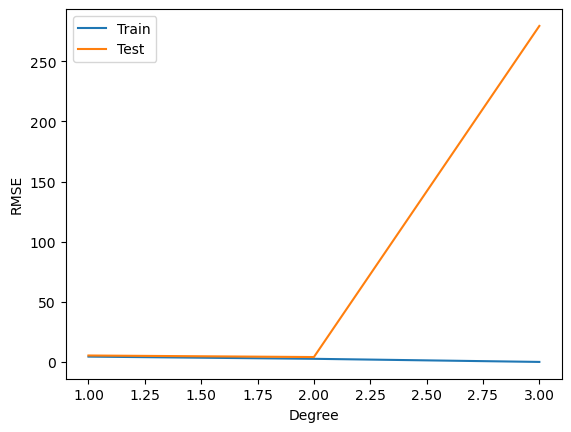

In [48]:
plt.plot(range(1, 4), train_RMSE_list[:3], label='Train')
plt.plot(range(1, 4), test_RMSE_list[:3], label='Test')

plt.xlabel('Degree')
plt.ylabel('RMSE')

plt.legend()

# Finished!